# Examples of AIC and BIC in Model Selection

We have seen that the AIC and BIC allow us to select models based on complexity and the relative contribution to accuracy, at the cost of adding additional parameters.

Below, find the equations for the AIC and BIC. Remember, lower AIC and BIC is a better model.

$AIC = -2 ln(\hat{L}) + 2K$

$BIC = -2 ln(\hat{L}) +K ln(N)$

where, $\hat{L}$ is the model likelihood, K is the number of model parameters, and N is the number of datapoints in the sample size.

Note we must estimate the likelihood function $\hat{L}$, and take it's natural log $ln$. We do this from the summed square error and it's variance $\sigma^2$:

$\hat{L} = \Pi_{i=1}^N\frac{1}{\sqrt{2 \pi \sigma^2}} exp(-\frac{(x_i -\mu)^2}{\sigma^2})$

where, $\mu$ is the mean, or the assumed model.

If we take the natural log of this, we get:

$ln(\hat{L}) = -N ln(\sigma) - \frac{N}{2} ln(2 \pi) - \Sigma_{i=1}^N \frac{(x_i -\mu)^2}{\sigma^2}$

We will use this to define our AIC and BIC functions below. To estimate the variance, we assume our model fit is $\mu$, and we find the variance of our data around our best-fit model.

Remember, these quantities cannot tell us how good a model fits our data. They can only tell us how good our model fits data *with respect to other models*



In [2]:
# import our libraries

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# AIC and BIC Functions

def LogLikelihood(data, model_output):
    '''
    Calculate the log-likelihood of our data w.r.t. the model estimate

    Inputs:
        - data, numpy array of the data
        - model, numpy array of the model estimate

    Outputs:
        - loglikelihood of the model-data fit
    '''
    N = len(data)
    sigma = np.std(data-model_output)
    return -N*sigma - N*np.log(2*np.pi)/2 - np.sum((data-model_output)**2)/(2*(sigma**2))


def AIC(model_output, data, nparams):
    '''
    Calculate the Akaike Information Criteria

    Inputs:
        - model, 
        - data,
        - nparams, number of parameters in the model

    Outputs:
        - AIC, Akaike Information Criteria (lower --> better)
    '''
    return 2*nparams - 2*LogLikelihood(model_output, data)


def BIC(model_output, data, nparams):
    '''
    Calculate the Bayes Information Criteria

    Inputs:
        - model, 
        - data,
        - nparams, number of parameters in the model

    Outputs:
        - BIC, Bayes Information Criteria (lower --> better)
    '''
    N = len(data)
    return nparams*np.log(N) - 2*LogLikelihood(data, model_output)

    

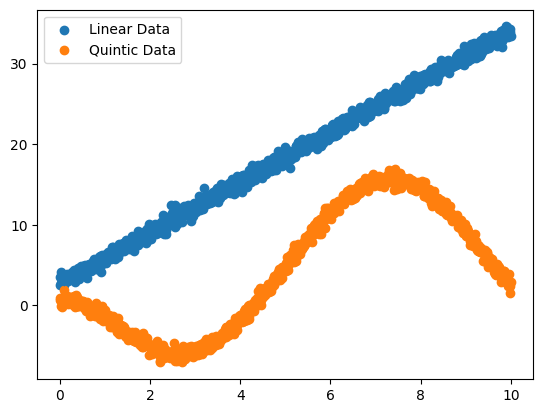

In [7]:
# Linear and Quintic Models from:
# https://sciences.ucf.edu/biology/d4lab/wp-content/uploads/sites/23/2020/02/Aho-etal-2014.pdf

# Linear Model
def LinearModel(x, m = 1, b = 1):
    '''
    Function which outputs a linear model given params (m,b)
    for y = m*x+b
    '''
    return m*x+b

def QuinticModel(x, a = 1, b = 1, c = 1, d = 1, e = 1, f = 1):
    '''
    Function which outputs a linear model given params (a,b,c,d,e,f)
    for y = quintic model
    '''
    params = (a,b,c,d,e,f)
    return np.polyval(params,x)

x_linear = np.linspace(0,10,1000)
y_linear = LinearModel(x_linear,np.pi,np.e) + np.random.normal(0, 0.5, size=x_linear.shape)

x_quintic = np.linspace(0,10,1000)
quintic_coeffs = (0.00991439, -0.25494052, 2.09258339, -5.4875, 1.63840559, 0.58181818)
y_quintic = QuinticModel(x_quintic, *quintic_coeffs)  + np.random.normal(0, 0.5, size=x_quintic.shape)

# Quintic Model

plt.scatter(x_linear,y_linear, label = 'Linear Data')
plt.plot(x_linear,y_linear)
plt.scatter(x_quintic,y_quintic, label = 'Quintic Data')
plt.plot(x_quintic,y_quintic)
plt.legend()
plt.show()

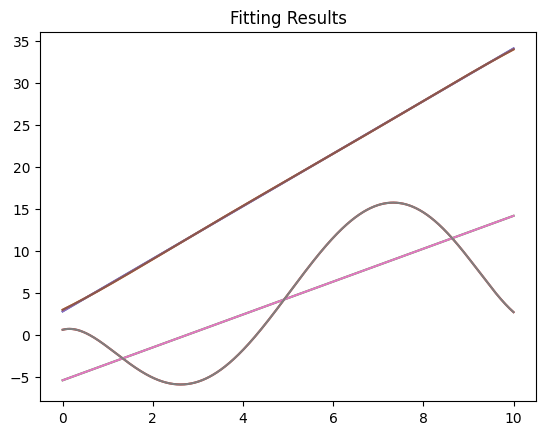

AIC: Linear Data, Linear Model -->  3864.677238709235
AIC: Linear Data, Quintic Model -->  3869.3767969519886
AIC: Quintic Data, Linear Model -->  12854.210650168421
AIC: Quintic Data, Quintic Model -->  3775.2885593947603
BIC: Linear Data, Linear Model -->  3874.4927492671995
BIC: Linear Data, Quintic Model -->  3898.8233286258815
BIC: Quintic Data, Linear Model -->  12864.026160726386
BIC: Quintic Data, Quintic Model -->  3804.735091068653


In [8]:
# Fit the linear Model
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

models = {
        'Linear Model' : LinearModel,
        'Quintic Model' : QuinticModel
          }

initial_guess = {
        'Linear Model' : (3,2),
        'Quintic Model' : (0.01, -0.25, 2.09, -5.4, 1.6, 0.58)
          }

n_params = {
        'Linear Model' : 2,
        'Quintic Model' : 6
          }

datas = {
        'Linear Data' : [x_linear, y_linear] ,
        'Quintic Data' : [x_quintic, y_quintic]
        }

methods = {'AIC' : AIC,
           'BIC' : BIC}

FitDictionary = {}

for method in methods:
        for data_key in datas:
                for model_key in models:
                        #Generate a new key
                        new_key = method + ': ' + data_key + ', ' + model_key + ' --> '

                        #Extract all the models and data from their dictionaries
                        this_model = models[model_key]
                        this_xdata = datas[data_key][0]
                        this_ydata = datas[data_key][1]
                        this_initialguess = initial_guess[model_key]
                        this_method = methods[method]

                        minimize_me = lambda params: this_model(this_xdata, *params) - this_ydata
                        fit = least_squares(minimize_me, this_initialguess)
                        p_opt = fit.x
                        
                        y_est = this_model(this_xdata, *p_opt) #run the fwd model with the given parameters
                        plt.plot(this_xdata,y_est)
                        
                        #get the fitness value using the specified method
                        FitnessValue = this_method(y_est, this_ydata, len(p_opt) ) 
                        FitDictionary[new_key] = FitnessValue

plt.title('Fitting Results')
plt.show()

for method in FitDictionary:
        print(method, FitDictionary[method])


Now, recall that models may be multi-variate, and depend on different compartments:

Simple Social-Connectedness Model:

$\frac{dX(t)}{dt} = 0$

$\frac{dY(t)}{dt} = k_{X,Y} X(t)$

Or, we can make the model more complicated by adding an additional dependency:

$\frac{dC(t)}{dt} = 0$

$\frac{dX(t)}{dt} = k_{C,X} C(t)$

$\frac{dY(t)}{dt} = k_{X,Y} X(t)+ k_{C,Y} C(t)$

However, in all of these situations, it would be difficult to measure all of the interacting dependencies. We may only get to measure immune function, $Y(t)$.

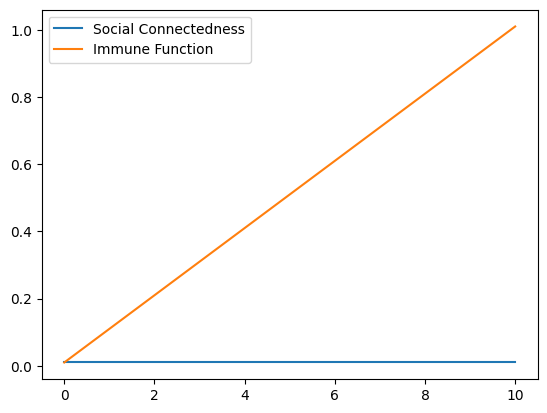

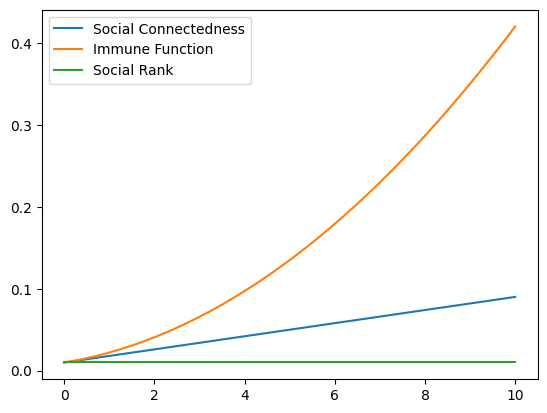

In [9]:
# Ecology Compartment Models from:
# https://royalsocietypublishing.org/doi/10.1098/rspb.2020.2815

from scipy.integrate import odeint

def SolveODE(model, IC, params, n = 100):
    '''
    Solve a generic ODE Model (single species)
    
    Inputs:
        - model, a function handle
        - IC, the initial condition
        - params, tuple of params (e.g (2))

    Outputs:
        - N_of_t, the integrated time trajectory of the model
    '''
    t = np.linspace(0,10,n)
    N_of_t = odeint(model,  #the model
                    IC,     #the number of cells in each well
                    t,      #time
                    args=params #model parameters
                    )
    return N_of_t.squeeze()

def LaubachSimple(x,t,a):
    '''
    Function which calculates the exponential growth of cells
    Inputs:
        - a, the transfer rate to immune function
        - x, list of "state function" values
        - t, time

    Outputs:
        - [dX/dt, dY/dt], rate of change of compartments
    '''

    X = x[0]
    Y = x[1]

    dXdt = 0
    dYdt = a*X

    return [dXdt,dYdt]

def LaubachComplex(x,t,a1,a2,a3):
    '''
    Function which calculates the exponential growth of cells
    Inputs:
        - a, the transfer rate to immune function
        - x, list of "state function" values
        - t, time

    Outputs:
        - [dX/dt, dY/dt, dC/dt], rate of change of compartments
    '''

    X = x[0]
    Y = x[1]
    C = x[2]

    dCdt = 0
    dXdt = a2*C
    dYdt = a1*X + a3*C

    return [dXdt,dYdt,dCdt]

params_simple = (10,)
params_complex = (0.8,0.8,0.1)

IC_simple = (0.01,0.01)
IC_complex = (0.01,0.01,0.01)
n_samples = 100

simple = SolveODE(LaubachSimple, IC_simple, params_simple, n = 100)
complx = SolveODE(LaubachComplex, IC_complex, params_complex, n = 100)

t = np.linspace(0,10,n_samples)

plt.plot(t,simple, label = ['Social Connectedness','Immune Function'])
plt.legend()
plt.show()
plt.plot(t,complx, label = ['Social Connectedness','Immune Function', 'Social Rank'])
plt.legend()
plt.show()

immune_simple = simple[:,1]
immune_complex = complx[:,1]

# Optional Exercise

Follow the same procedure we used for the linear and quintic models, and use the AIC and BIC to determine which model is the most parsimonius for both the data we generated using the simple and complex Laubach models.